# Loading Data

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
train = pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [170]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observações

891 linhas, 12 colunas <br><br>

1) checar para dados vazios ou não numéricos (isnull() e isna())<br>
- idade 177 NAs <br>
- cabine 687 NAs <br>
<br>

2) preencher os dados vazios (idade e cabine) <br>
- idade
- cabine
- porto

# Análise Exploratória

| variável | definição | chave |
| --- | --- | --- |
| survived | Sobreviveu? | 0 = Não, 1 = Sim|
| pclass | Classe no navio | 1 = primeira, 2 = segunda, 3 = terceira|
| sex | Sexo | |
| Age | Idade em anos | |
| SibSp | # de irmãos / esposas a bordo | |
| Parch | # de parentes / crianças a bordo | |
| Ticket | número da passagem | |
| Fare | valor da passagem | |
| Cabin | Número da cabine |
| Embarked | Porto de embarque | C = Cherbourg, Q = Queenstown, S = Southampton|

In [171]:
# palette

sns.set_theme(style="darkgrid")
sns.set_palette('coolwarm')

<Axes: xlabel='Pclass', ylabel='count'>

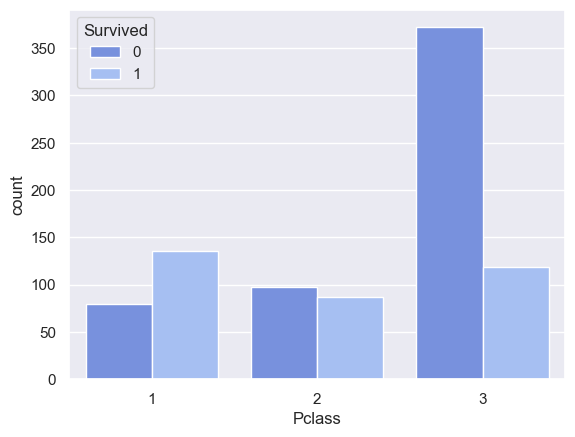

In [172]:
sns.countplot(data = train, x = "Pclass", hue = "Survived")

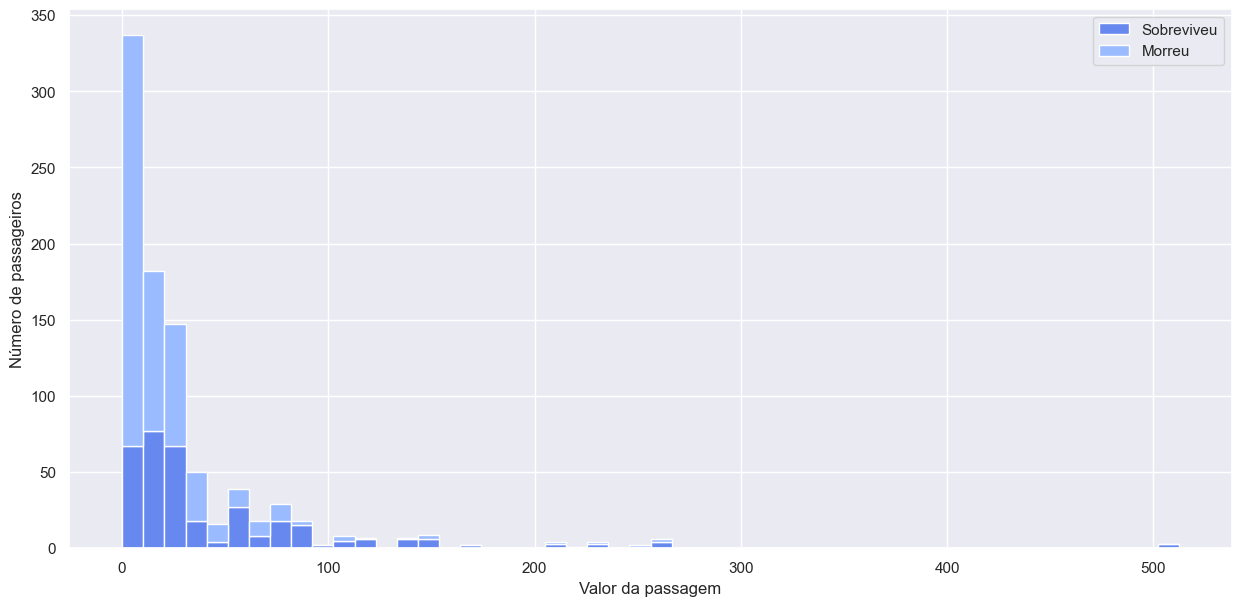

In [173]:
plt.figure(figsize = (15, 7))
plt.hist([train[train.Survived == 1]['Fare'], train[train.Survived == 0]['Fare']], stacked = True,
         bins = 50, label = ['Sobreviveu', 'Morreu'])
plt.xlabel('Valor da passagem')
plt.ylabel('Número de passageiros')
plt.legend()

*Observação:*

- pessoas nas classes 1 e 2 tem mais chances de sobreviver
- pessoas com passagens mais baratas tem mais chances de morrer
- existe correlação entre o preço das tarifas e as classes

<Axes: xlabel='Sex', ylabel='Age'>

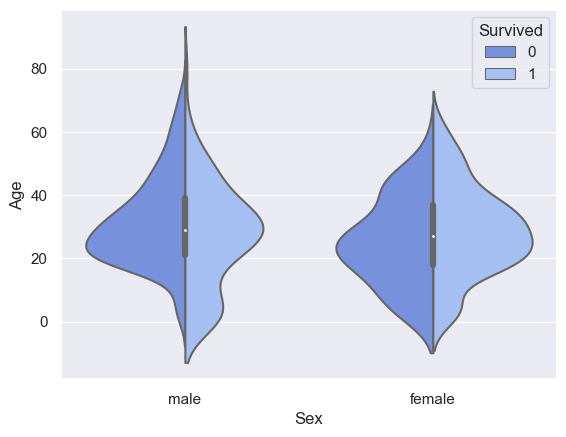

In [174]:
sns.violinplot(data = train, x = 'Sex', y = "Age", hue = "Survived", split = True)

*Observação:*
- mulheres sobrevivem mais do que homens
- homens jovens tendem a sobreviver
- número grande de homens entre 20 e 40 anos não sobrevivem
- idade não parece ter um impacto direto na sobrevivência das mulheres

Conduta: mulheres e crianças primeiro!


<Figure size 1200x400 with 0 Axes>

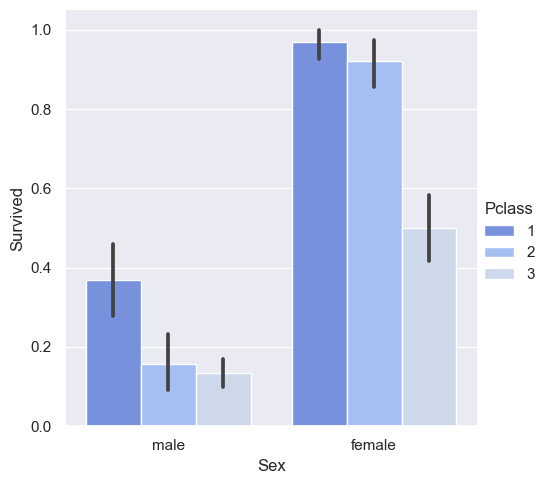

In [175]:
#catplot
plt.figure(figsize = (12,4))
ax = sns.catplot(data=train, x="Sex", y="Survived", hue="Pclass", kind = 'bar')
ax

<Axes: xlabel='Embarked', ylabel='Fare'>

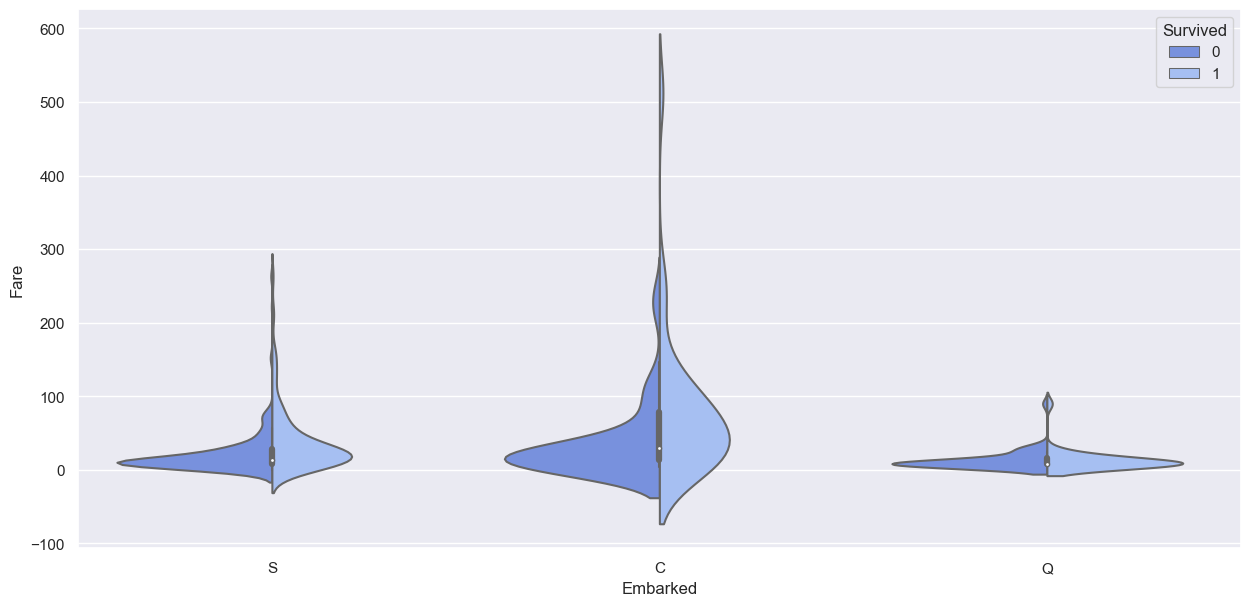

In [176]:
plt.figure(figsize=(15, 7))
sns.violinplot(data = train, x="Embarked", y = 'Fare', kind = "count", hue = "Survived",
               split = True)

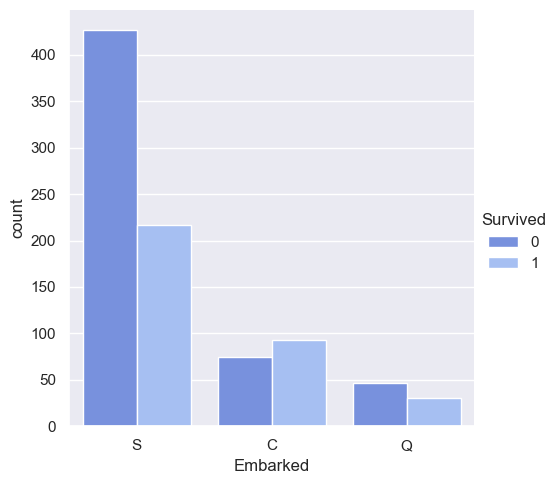

In [177]:
sns.catplot(data = train, x = 'Embarked', hue = 'Survived', kind = 'count')

*Observação:*
- Os valores das tarifas no porto C tem um intervalo maior, por isso, passageiros que pagaram maior tarifa, sobreviveram.
- Isso acontece também nos portos S e menos no porto Q (menores tarifas)

# Feature Engineering

In [178]:
# função para dizer se a feature foi ou não processada

def status(feature):
    print('Processando', feature, ': ok')


## Unindo train e test

In [179]:
# unindo train e test para previnir vazamento de informações e adicionar novas variáveis

def combined_data():

    # lendo dados de treino
    train = pd.read_csv('train.csv')

    # lendo dados de teste
    test = pd.read_csv('test.csv')

    # extração e remoção da variável alvo do conjunto de treino
    targets = train.Survived
    train.drop(['Survived'], axis = 1, inplace = True)

    # merge os dois conjuntos para feature engineering
    # remoção PassengerId porque não é uma feature informativa
    combined = pd.concat([train, test])
    combined.reset_index(inplace = True)
    combined.drop(['index', 'PassengerId'], axis = 1, inplace = True)

    return combined

combined = combined_data()

In [180]:
combined.shape

(1309, 10)

In [181]:
combined.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Extraindo o título

In [182]:
titulos = set()
for nome in combined['Name']:
    titulos.add(nome.split(',')[1].split('.')[0].strip())

print(titulos)

{'Capt', 'Miss', 'Mr', 'Mme', 'Mlle', 'Major', 'the Countess', 'Lady', 'Dr', 'Don', 'Mrs', 'Rev', 'Sir', 'Col', 'Dona', 'Ms', 'Master', 'Jonkheer'}


In [183]:
dic_titulos = {
    'Rev' : 'Officer',
    'Col' : 'Officer',
    'the Countess' : 'Royalty',
    'Don' : 'Royalty',
    'Mrs': 'Mrs',
    'Major': 'Officer',
    'Mlle' : 'Miss',
    'Capt' : 'Officer',
    'Jonkheer' : 'Royalty',
    'Lady' : 'Royalty',
    'Dona' : 'Royalty',
    'Dr' : 'Officer',
    'Mr' : 'Mr',
    'Sir': 'Royalty',
    'Master' : 'Master',
    'Miss' : 'Miss',
    'Ms': 'Mrs',
    'Mme' : 'Mrs'
}

def titulos_passageiros():
    # extração do título de cada nome
    combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

    # agregado os títulos de acordo com o dicionário
    combined['Title'] = combined.Title.map(dic_titulos)
    status('Title')

    return combined

In [184]:
combined = titulos_passageiros()
combined.head(10)

Processando Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [185]:
combined[combined.Title.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [186]:
combined.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

## Processando as features

Temos 177 idades faltantes no dataset de treino.
Preencher apenas com a média ou mediana pode ser não ser a melhor solução, já que a idade dos passageiros pode ser diferente por grupos e categorias.

Primeiro, vamos agrupar por sexo, título e classe e para cada subset calcular a mediana da idade.

- Para não haver vazamento de dados, vamos usar apenas os dados do dataset de treino.

In [187]:
# número de idades faltantes no dataset de treino

print(combined.iloc[:891].Age.isnull().sum())

177


In [188]:
# número de idades faltantes no dataset de teste

print(combined.iloc[891:].Age.isnull().sum())

86


In [189]:
train_group = combined.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
train_group_median = train_group.Age.median()
train_group_median = train_group_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

train_group_median

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


In [190]:
# criando a função que preenche os valores faltantes de acordo com o critério acima

def preenche_idade(linha):
    condicao = (
        (train_group_median['Sex'] == linha['Sex']) &
        (train_group_median['Title'] == linha['Title']) &
        (train_group_median['Pclass'] == linha['Pclass'])
    )
    return train_group_median[condicao]['Age'].values[0]

def processa_idade():
    global combined

    # função que preenche os valores faltantes da coluna Age
    combined['Age'] = combined.apply(lambda linha: preenche_idade(linha) if np.isnan(
        linha['Age']) else linha['Age'], axis = 1)
    
    status('age')
    return combined

In [191]:
combined = processa_idade()
combined.info()

Processando age : ok
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Title     1309 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 112.6+ KB


In [192]:
# processando os nomes e títulos

def processa_nomes():
    global combined
    
    #limpa a variável nome
    combined.drop('Name', axis = 1, inplace = True)

    # encoding dummies
    titulos_dummies = pd.get_dummies(combined['Title'], prefix = 'Title', dtype = int)
    combined = pd.concat([combined, titulos_dummies], axis = 1)

    # removendo a variável Title
    combined.drop('Title', axis = 1, inplace = True)

    status('names')
    return combined

In [193]:
combined = processa_nomes()
combined.head(10)

Processando names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0
5,3,male,26.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,0,0
6,1,male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,0,0
7,3,male,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,0,0
8,3,female,27.0,0,2,347742,11.1333,NaN,S,0,0,0,1,0,0
9,2,female,14.0,1,0,237736,30.0708,NaN,C,0,0,0,1,0,0


In [194]:
# processando as tarifas

def processa_tarifas():
    global combined

    # tem apenas um valor de tarifa faltante, preencher com média
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace = True)
    status('fare')
    return combined

In [195]:
combined = processa_tarifas()

Processando fare : ok


In [196]:
# processando o porto de embarque

def processa_porto():
    global combined
    
    # tem apenas dois valores faltantes, preencher com o valor mais frequente no dataset de treino
    combined.Embarked.fillna('S', inplace = True)

    # dummy enconding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix = 'Embarked', dtype = int)
    combined = pd.concat([combined, embarked_dummies], axis = 1)
    combined.drop('Embarked', axis = 1, inplace = True)

    status('embarked')
    return combined

In [197]:
combined = processa_porto()

combined.head()

Processando embarked : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [198]:
# processamento das cabines

train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

print(train_cabin)
print(test_cabin)

{'C', 'D', 'A', 'G', 'B', 'F', 'E', 'U', 'T'}
{'C', 'D', 'A', 'F', 'B', 'G', 'E', 'U'}


In [199]:
def processa_cabines():
    global combined

    # substituindo os valores faltantes por U de desconhecido (unknown)
    combined.Cabin.fillna('U', inplace = True)

    # mapeando cada valor com a letra da cabine
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])

    # dummy
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix = 'Cabin', dtype = int)
    combined = pd.concat([combined, cabin_dummies], axis = 1)

    combined.drop('Cabin', axis = 1, inplace = True)
    status('cabine')
    return combined

In [200]:
combined = processa_cabines()
combined.head(10)

Processando cabine : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
5,3,male,26.0,0,0,330877,8.4583,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,1,male,54.0,0,0,17463,51.8625,0,0,1,...,1,0,0,0,0,1,0,0,0,0
7,3,male,2.0,3,1,349909,21.0750,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8,3,female,27.0,0,2,347742,11.1333,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,2,female,14.0,1,0,237736,30.0708,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [201]:
# processando sexo

def processa_sexo():
    global combined

    combined['Sex'] = combined['Sex'].replace({'male': 1, 'female': 0})
    status('sex')
    return combined

In [202]:
combined = processa_sexo()
combined.head()

Processando sex : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [203]:
# processando a classe

def processa_classe():
    global combined

    class_dummies = pd.get_dummies(combined['Pclass'], prefix = 'Pclass', dtype = int)
    combined = pd.concat([combined, class_dummies], axis = 1)

    combined.drop('Pclass', axis = 1, inplace = True)

    status('classe')
    return combined

In [204]:
combined = processa_classe()
combined.head()

Processando classe : ok


,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [205]:
# processando tickets (prefixos)

def limpa_ticket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(limpa_ticket(t))

print(len(tickets))

37


In [206]:
def processa_ticket():
    
    global combined
    
    # função que extrai cada prefixo do ticket e retorna 'XXX' se não tem prefixo
    def limpa_ticket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # dummies

    combined['Ticket'] = combined['Ticket'].map(limpa_ticket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket', dtype = int)
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [207]:
combined = processa_ticket()
combined.head()

Processando Ticket : ok


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [208]:
def processa_familia():
    
    global combined
    #nova feature : tamanho da família incluindo o passageiro
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # novas features baseadas no tamanho da família
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('familia')
    return combined

In [209]:
combined = processa_familia()
combined.head()

Processando familia : ok


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


In [210]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1309 non-null   int64  
 1   Age             1309 non-null   float64
 2   SibSp           1309 non-null   int64  
 3   Parch           1309 non-null   int64  
 4   Fare            1309 non-null   float64
 5   Title_Master    1309 non-null   int32  
 6   Title_Miss      1309 non-null   int32  
 7   Title_Mr        1309 non-null   int32  
 8   Title_Mrs       1309 non-null   int32  
 9   Title_Officer   1309 non-null   int32  
 10  Title_Royalty   1309 non-null   int32  
 11  Embarked_C      1309 non-null   int32  
 12  Embarked_Q      1309 non-null   int32  
 13  Embarked_S      1309 non-null   int32  
 14  Cabin_A         1309 non-null   int32  
 15  Cabin_B         1309 non-null   int32  
 16  Cabin_C         1309 non-null   int32  
 17  Cabin_D         1309 non-null   i

In [211]:
corr = combined.corr()

<Axes: >

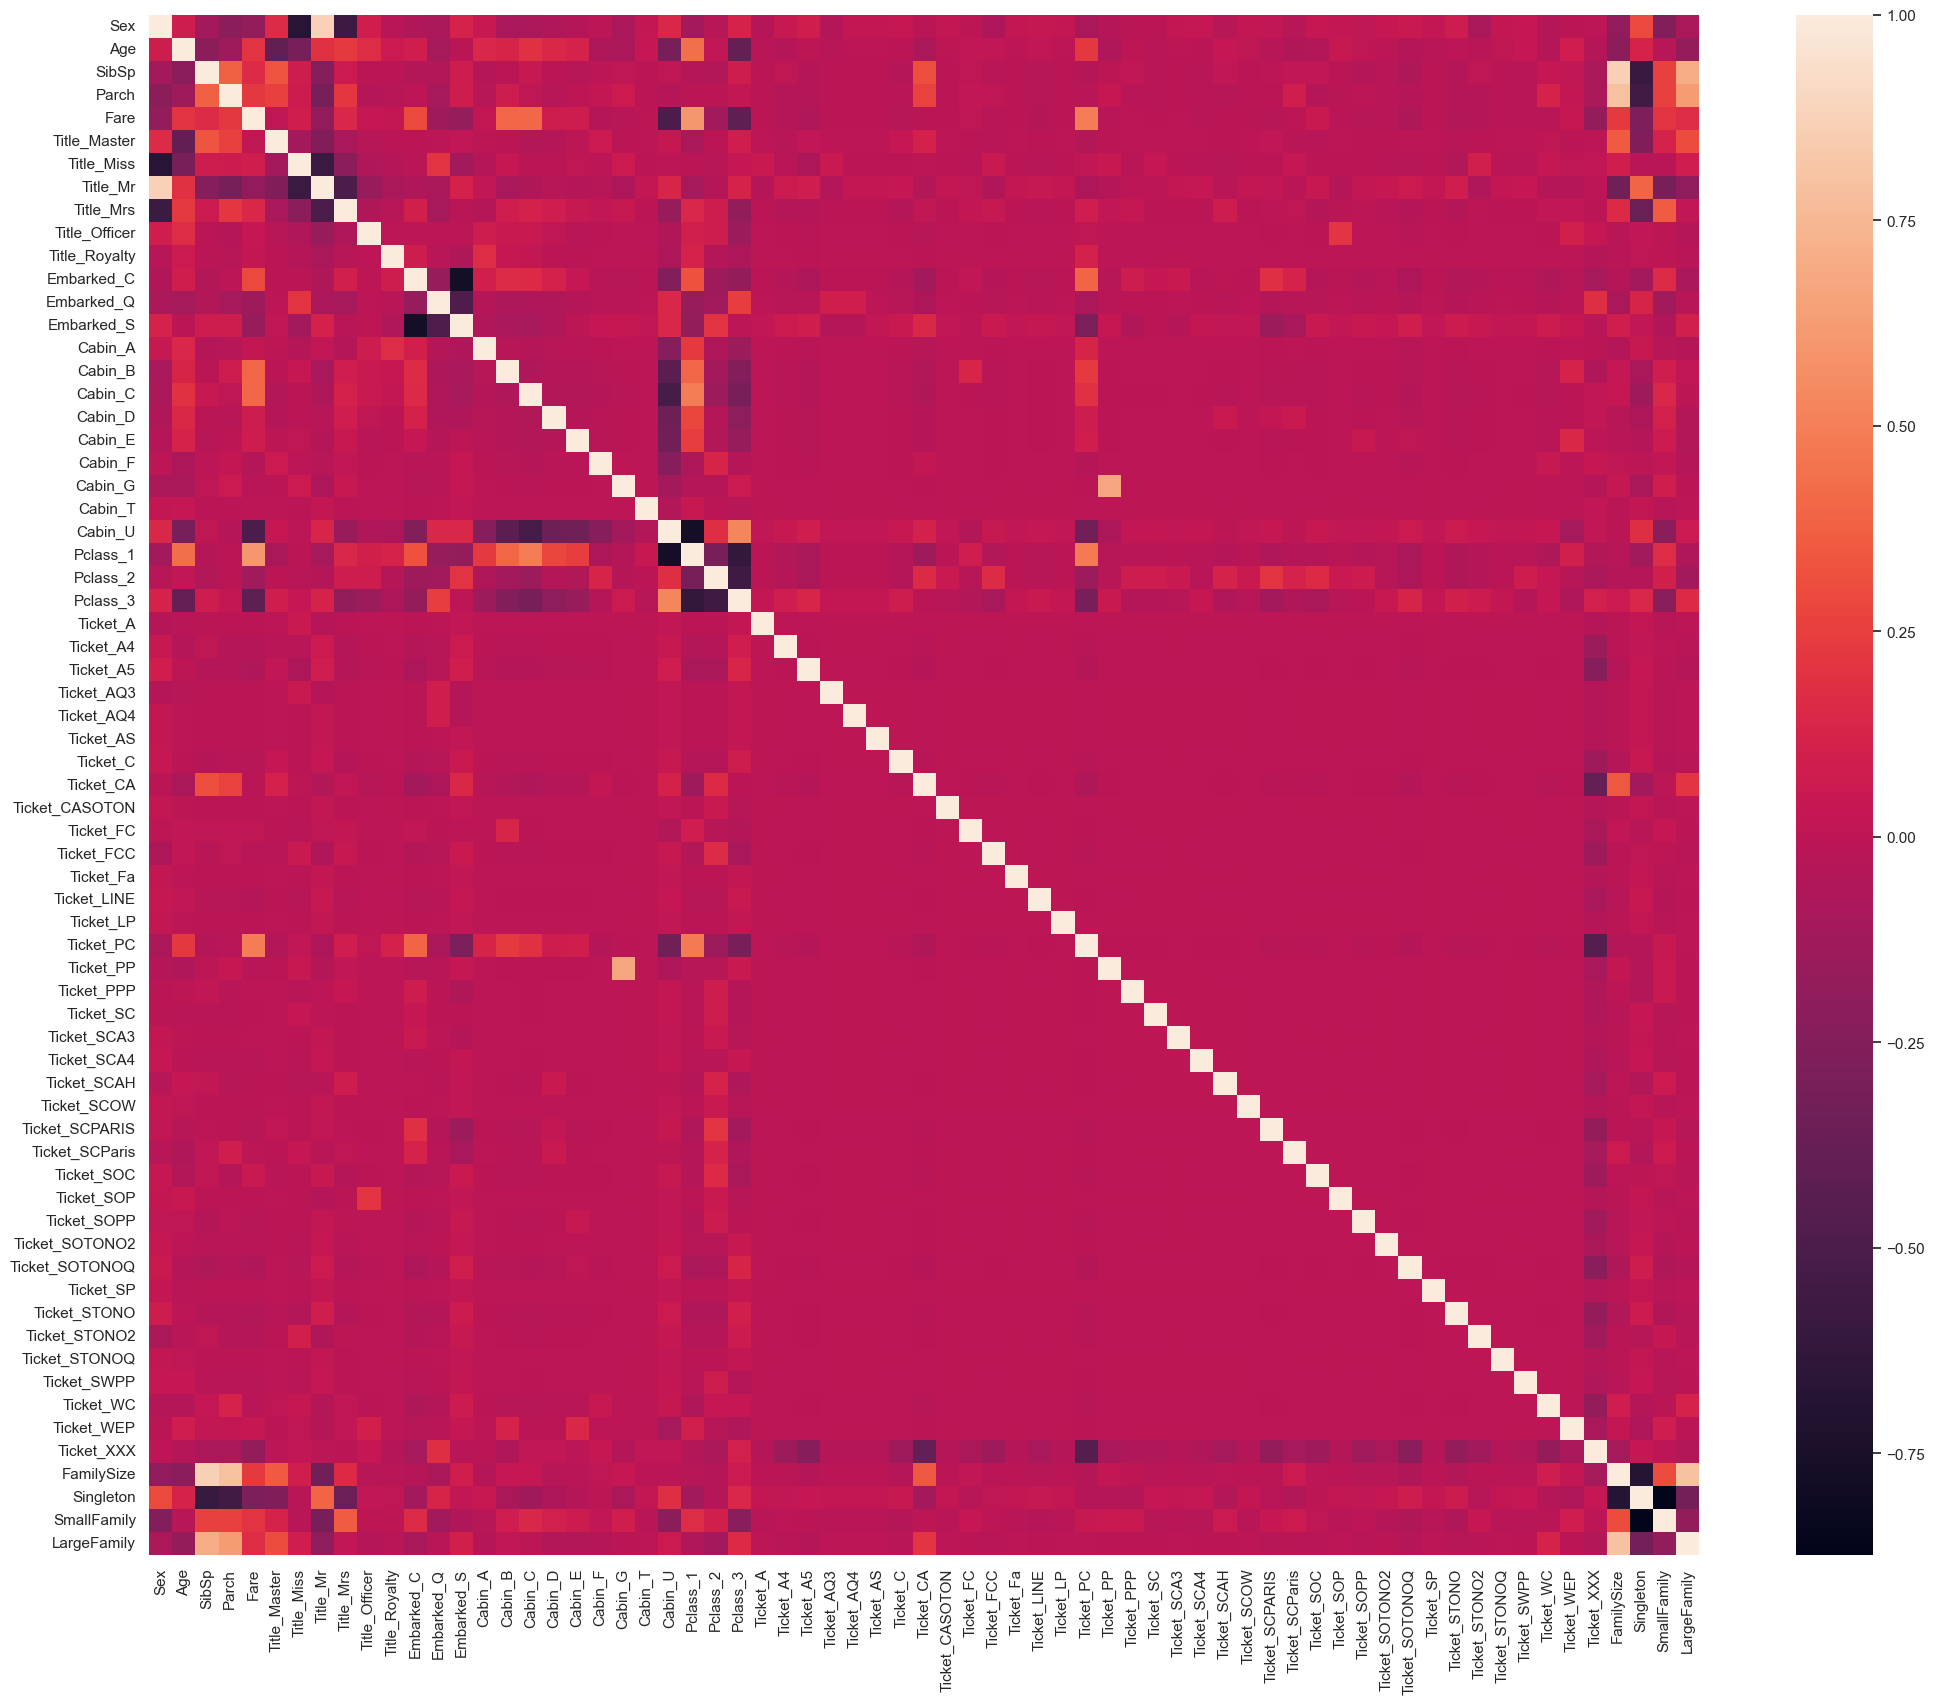

In [212]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr)

# Modelo de Machine Learning

In [213]:
def recover_train_test():

    global combined

    y = pd.read_csv('train.csv', usecols = ['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]

    return y, train, test

In [214]:
y, train, test = recover_train_test()

## Balanceando os dados

In [215]:
from imblearn.over_sampling import SMOTE

SEED = 0
np.random.seed(SEED)

smote = SMOTE(random_state=SEED)

In [216]:
train, y = smote.fit_resample(train, y)

In [217]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [218]:
SEED = 0
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, stratify = y)
print("Training with %d elements and testing with %d elements." % (len(X_train), len(X_test)))

Training with 768 elements and testing with 330 elements.


In [219]:
def calcula_metricas(test_y, predictions):
    
    print('Acurácia:', round(metrics.accuracy_score(test_y, predictions)*100, 2))
    print('Precisão:', round(metrics.precision_score(test_y, predictions)*100, 2))
    print('Recall:', round(metrics.recall_score(test_y, predictions)*100, 2))
    print('F1:', round(metrics.f1_score(test_y, predictions)*100, 2))

In [220]:
def matriz_confusao(test_y, predictions):

    cm = confusion_matrix(test_y, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()

In [221]:
# dummy
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)

acuracia_dummy = dummy.score(X_test, y_test) * 100

print("Acurácia dummy foi: %.2f%%" % acuracia_dummy)

Acurácia dummy foi: 50.00%


Acurácia: 86.06
Precisão: 88.89
Recall: 82.42
F1: 85.53


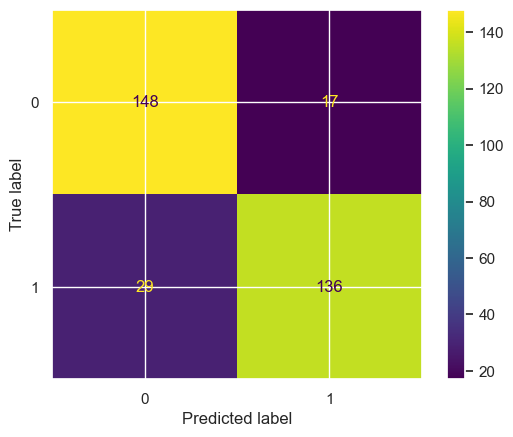

In [222]:
# random forest

SEED = 0
np.random.seed(SEED)
rfc = RandomForestClassifier(max_depth=5, n_estimators = 50, max_features= 'sqrt')
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)

calcula_metricas(y_test, preds)
matriz_confusao(y_test, preds)

<Axes: ylabel='feature'>

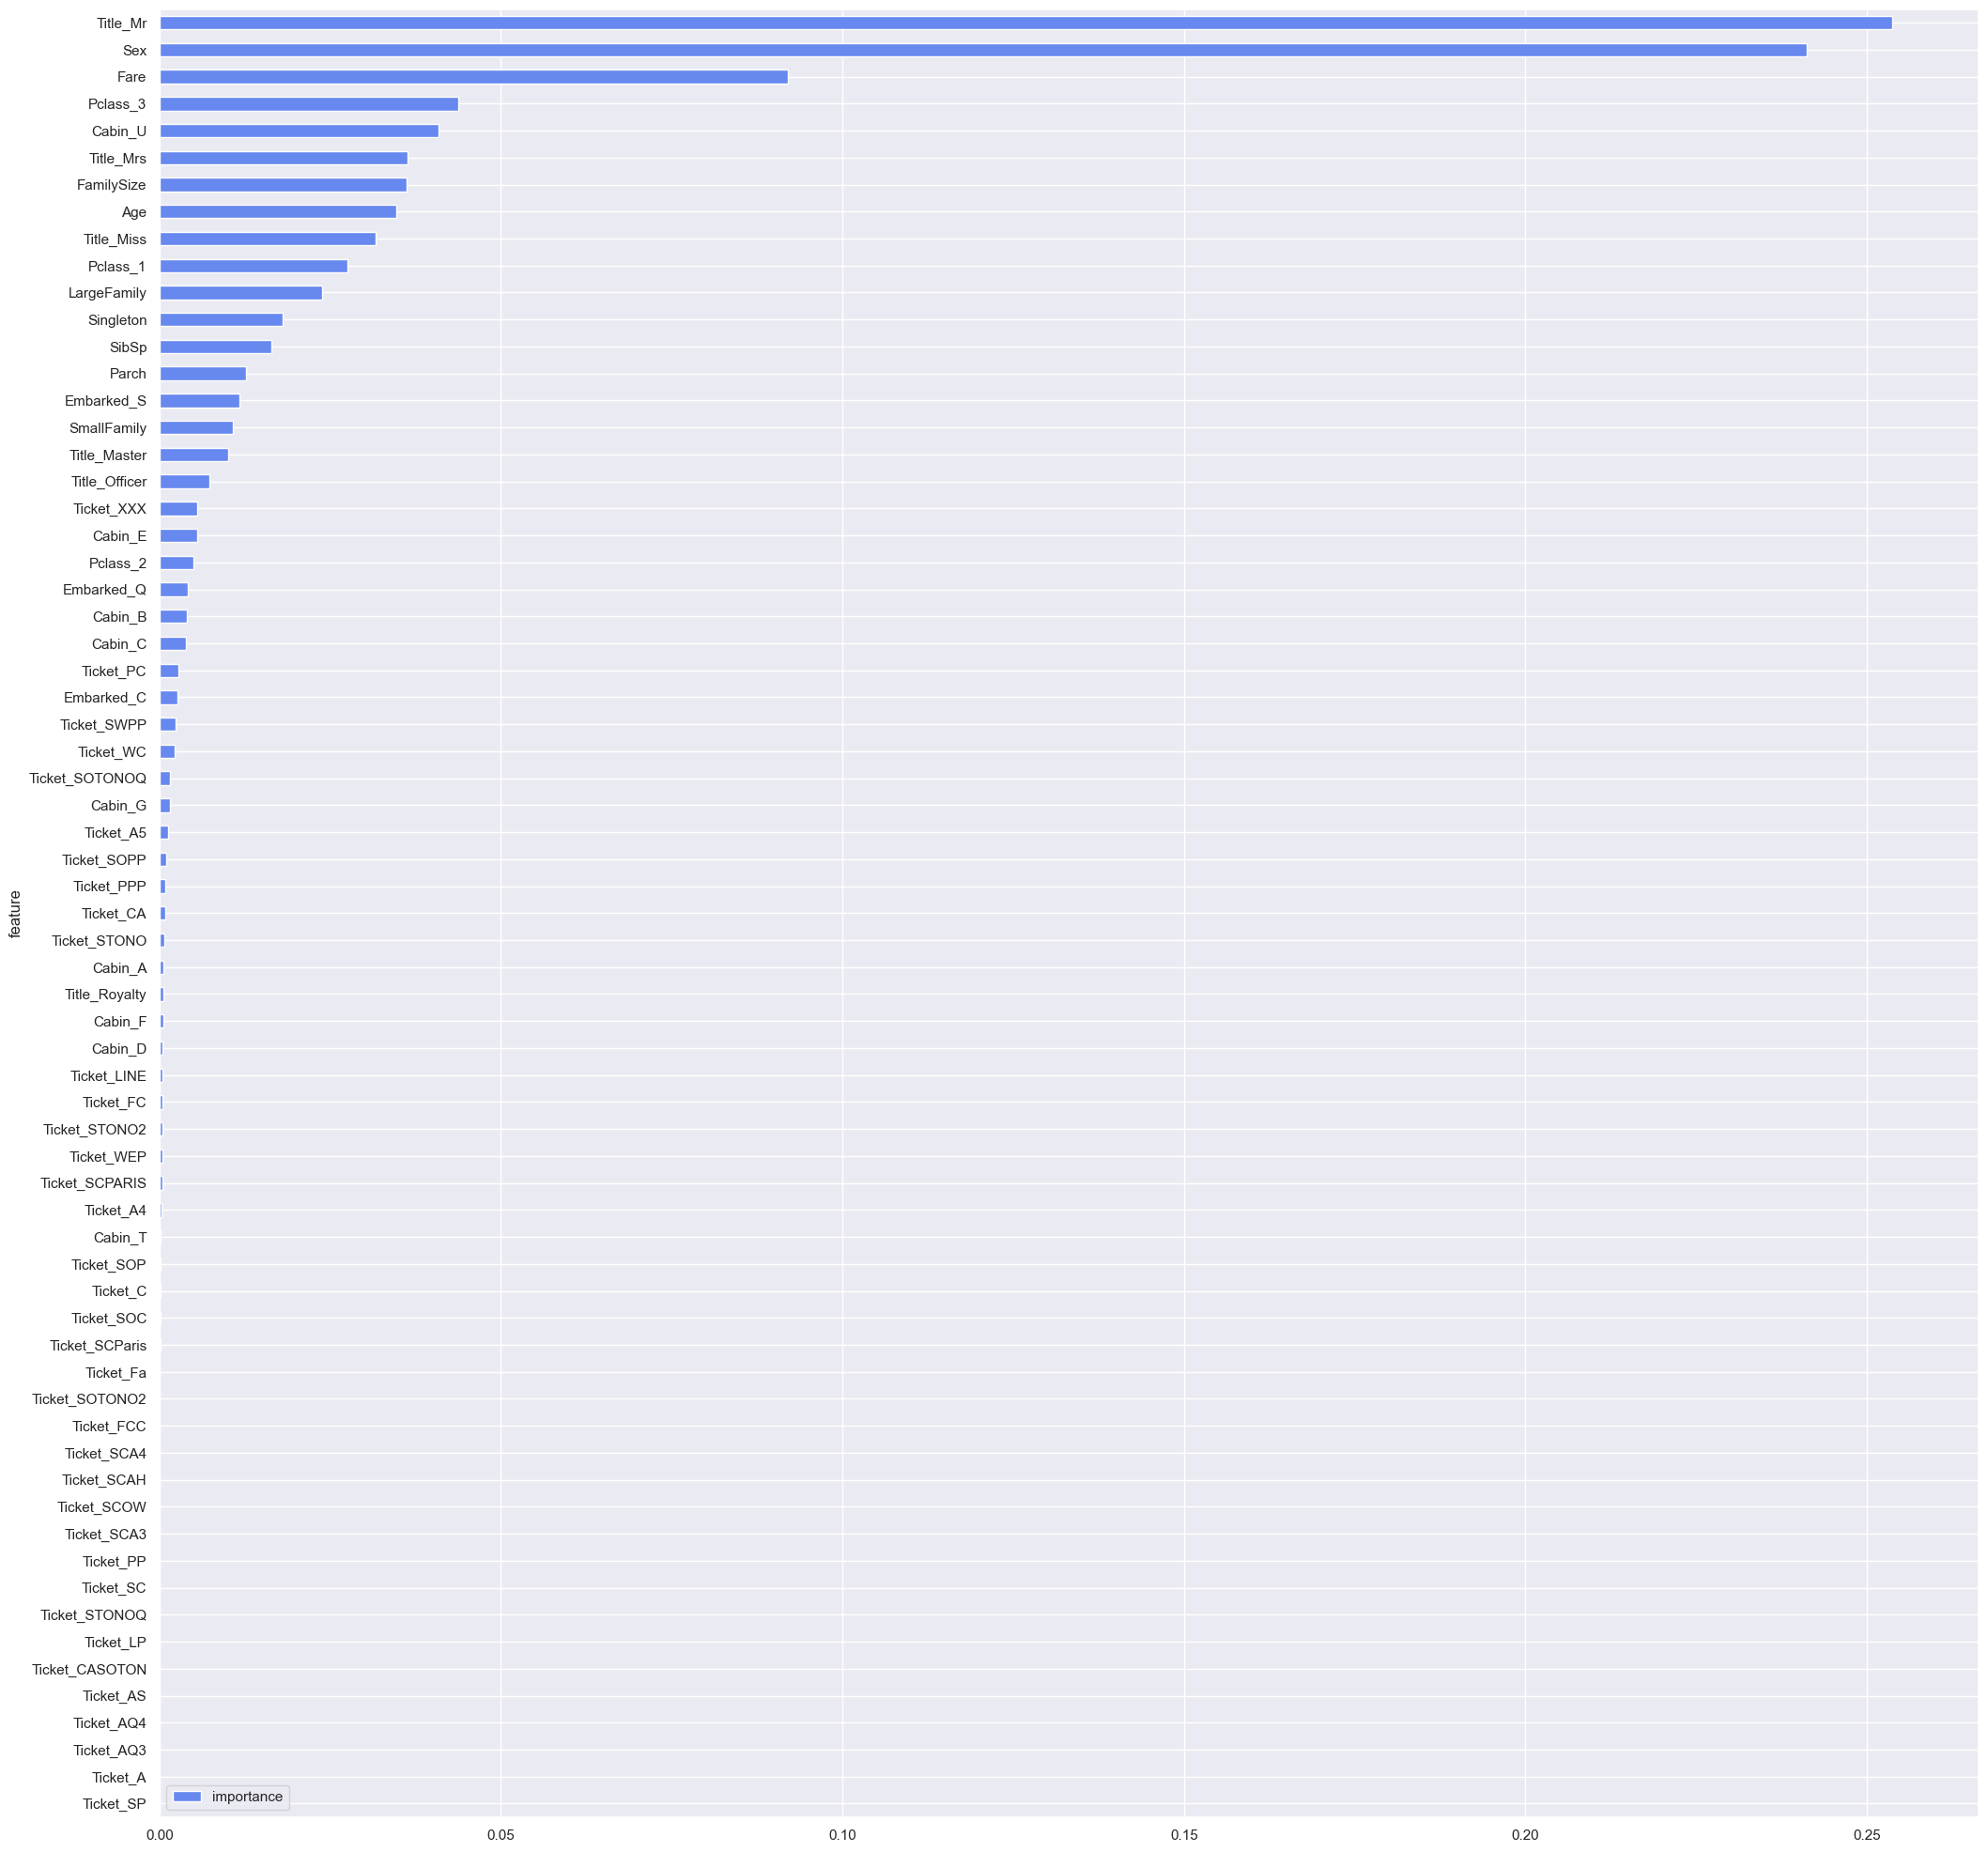

In [223]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [224]:
# from sklearn.feature_selection import SelectFromModel

# model = SelectFromModel(rfc, prefit=True)
# train_reduced = model.transform(train)
# print(train_reduced.shape)


# test_reduced = model.transform(test)
# print(test_reduced.shape)

In [225]:
# SEED = 0
# np.random.seed(SEED)

# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, stratify = y)
# print("Training with %d elements and testing with %d elements." % (len(X_train), len(X_test)))

In [226]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

SEED = 0
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)
model = RandomForestClassifier(max_depth=5)
results = cross_validate(model, train, y, cv = cv, return_train_score= False)

mean = results['test_score'].mean()
std_dev = results['test_score'].std()
print("Accuracy mean: %.2f" % (mean * 100))
print("Accuracy with cross validation = [%.2f, %.2f]" % ((mean - 2 * std_dev) * 100, (mean + 2 * std_dev) * 100))

Accuracy mean: 84.33
Accuracy with cross validation = [78.14, 90.52]


In [227]:
# lista de parâmetros que serão testados

n_estimators = [100, 150, 200]
max_depth = [2, 5, 10]
min_samples_split = [2, 4, 6]
min_samples_leaf = [1, 2, 4]

In [228]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [229]:
from sklearn.model_selection import GridSearchCV

SEED = 0
np.random.seed(SEED)

grid_cv = GridSearchCV(model, param_grid,
                             cv=cv, scoring="accuracy", n_jobs = -1)

In [230]:
# rodando o modelo com o grid search
busca = grid_cv.fit(train, y)

In [231]:
# cria um dataframe com os resultados do grid search
pd.DataFrame(busca.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.209531,0.007603,0.018746,0.006248,2,1,2,100,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.845455,...,0.854545,0.763636,0.836364,0.827273,0.772727,0.807339,0.834862,0.825129,0.034009,60
1,0.296484,0.010499,0.022491,0.008583,2,1,2,150,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.809091,...,0.836364,0.763636,0.854545,0.836364,0.763636,0.816514,0.834862,0.821501,0.032533,72
2,0.383522,0.015734,0.035929,0.007158,2,1,2,200,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.809091,...,0.836364,0.745455,0.836364,0.827273,0.781818,0.816514,0.825688,0.820584,0.034017,74
3,0.205394,0.008083,0.018745,0.006249,2,1,4,100,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.809091,...,0.854545,0.772727,0.836364,0.818182,0.772727,0.816514,0.834862,0.823319,0.030452,66
4,0.299930,0.009373,0.029682,0.004687,2,1,4,150,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.800000,...,0.836364,0.736364,0.845455,0.827273,0.772727,0.816514,0.834862,0.819683,0.038476,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.674976,0.014692,0.046710,0.011400,10,4,4,150,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.827273,...,0.909091,0.790909,0.863636,0.863636,0.809091,0.816514,0.853211,0.849700,0.035870,10
77,0.876550,0.062247,0.053548,0.006345,10,4,4,200,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.827273,...,0.909091,0.800000,0.872727,0.845455,0.809091,0.816514,0.853211,0.848791,0.034199,16
78,0.402075,0.011667,0.026965,0.001902,10,4,6,100,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.818182,...,0.909091,0.790909,0.863636,0.863636,0.809091,0.816514,0.871560,0.849716,0.036724,8
79,0.593084,0.027744,0.039130,0.002452,10,4,6,150,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.836364,...,0.900000,0.800000,0.872727,0.863636,0.800000,0.816514,0.853211,0.850609,0.034215,6


In [232]:
# encontra os melhores parâmetros
busca.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [233]:
# rodando de novo o modelo com os parâmetros encontrados

rf = RandomForestClassifier(**busca.best_params_)

modelo = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Acurácia: 86.36
Precisão: 89.47
Recall: 82.42
F1: 85.8


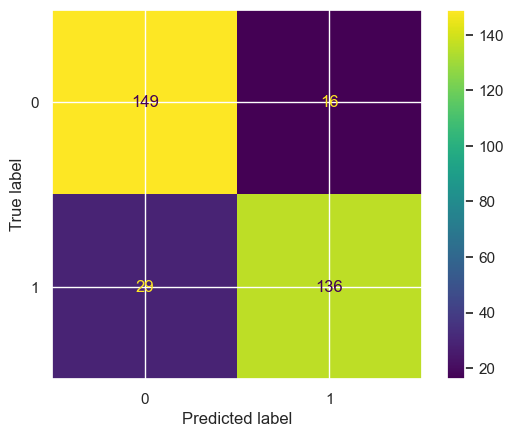

In [234]:
calcula_metricas(y_test, y_pred)
matriz_confusao(y_test, y_pred)

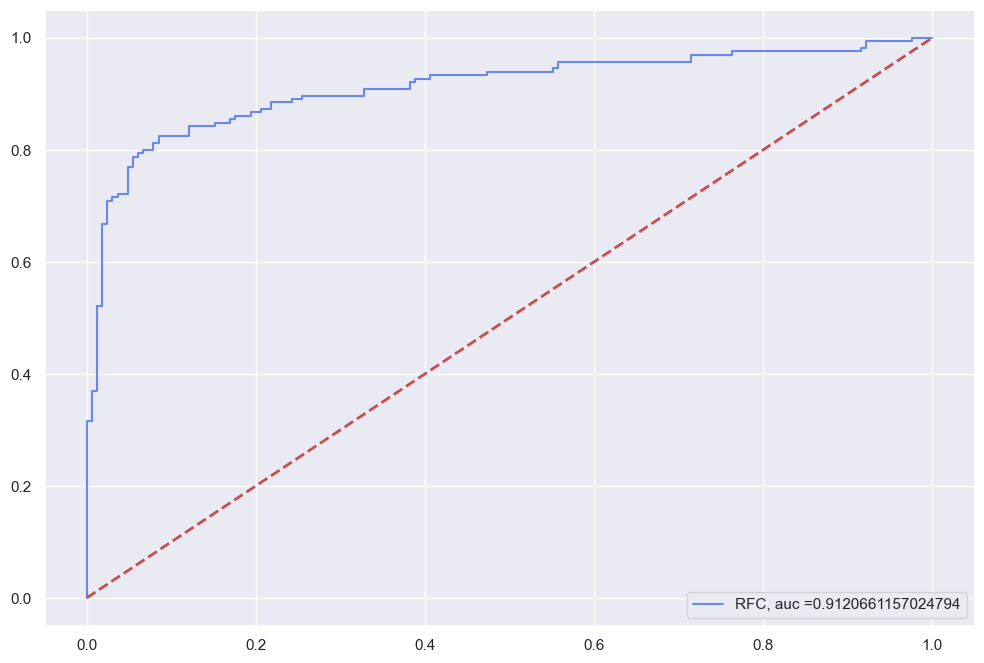

In [235]:
y_pred_proba = modelo.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label = 'RFC, auc ='+str(auc))
plt.plot([0, 1], [0, 1], color = 'r', lw = 2, linestyle = '--')
plt.legend(loc = 4)

In [236]:
output = modelo.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('gridsearch4_rf.csv', index=False)

# Score: 0.79186